In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop('Unnamed: 32', axis = 1, inplace= True)

In [6]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
x = data.drop('diagnosis', axis = 1)
y = data.diagnosis

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from scipy.stats import zscore

x_scaled = x.apply(zscore) 

In [13]:
x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.3, random_state=1)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
temp = []

for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, x_scaled_df,y, cv=10)
    temp.append(score.mean())

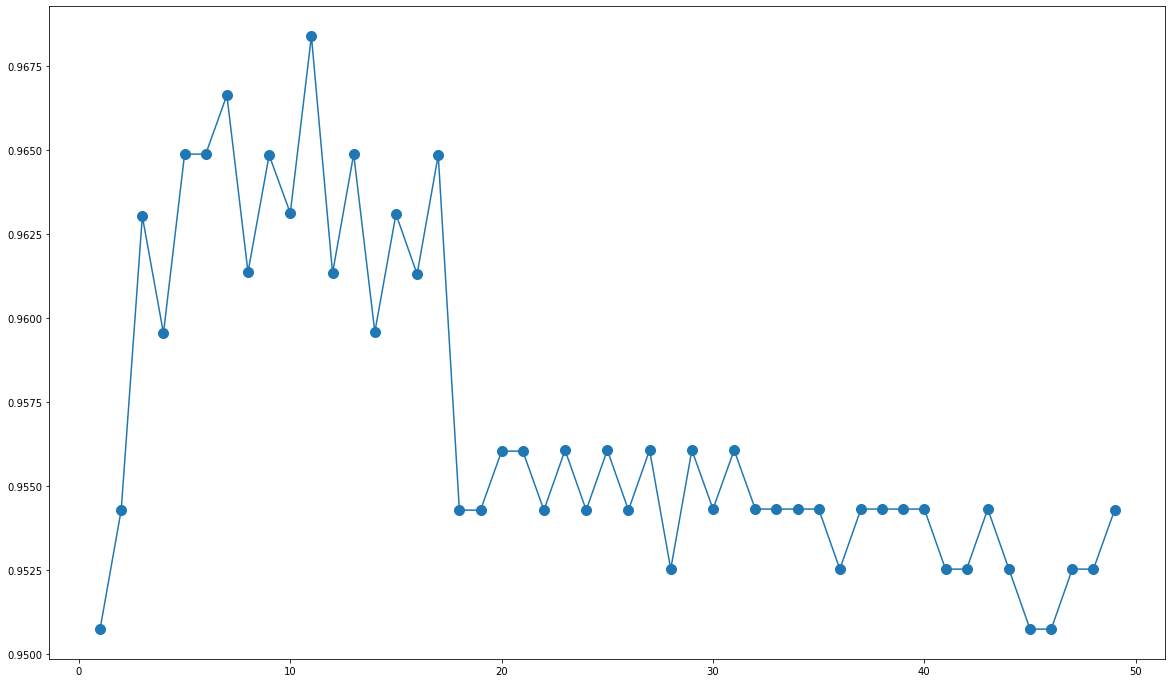

In [17]:
plt.figure(figsize=(20,12))
plt.plot(range(1,50),temp, markersize = 10, marker = 'o')
plt.show()

In [18]:
best_model = KNeighborsClassifier(n_neighbors=9)

In [19]:
best_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [20]:
prediction = best_model.predict(x_test)

In [21]:
best_model.score(x_test, y_test)

0.9649122807017544

In [22]:
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

<AxesSubplot:>

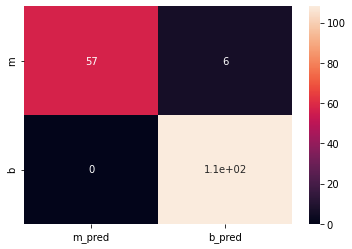

In [23]:
cm = metrics.confusion_matrix(y_test, prediction, labels=['M','B'])
cm_df = pd.DataFrame(cm, index=[i for i in ['m','b']], columns = [i for i in ['m_pred','b_pred']])
sns.heatmap(cm_df, annot = True)

In [32]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [34]:
print(metrics.classification_report(y_test, prediction))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           B       0.95      1.00      0.97       108
           M       1.00      0.90      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

